### Topic: Challenge Set 10
### Subject: Explore Decision Trees
### Date: 02/18/2018
### Name: Subramanian Iyer
### Worked With: Got help from Jon for printing the trees.

In [1]:
import pandas as pd
import numpy as np
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.externals.six import StringIO
from IPython.display import Image
import pydotplus
from sklearn.tree import export_graphviz

warnings.filterwarnings('ignore')
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/voting-records/house-votes-84.data"
df = pd.read_csv(url, header = None, names = ['Party'] + ['v'+str(i) for i in range(1,17)])
def numify(i):
    if i =='y':
        return 1
    elif i =='n':
        return 0
    else:
        return np.nan
for i in range(1,17):
    df['v'+str(i)] = [numify(j) for j in df['v'+str(i)]]
df.fillna(df.mean(), inplace = True)
df.head()

,Party,v1,v2,v3,v4,v5,v6,v7,v8,v9,v10,v11,v12,v13,v14,v15,v16
0,republican,0.00000,1.0,0.0,1.000000,1.000000,1.0,0.0,0.0,0.0,1.0,0.362319,1.000000,1.0,1.0,0.0,1.000000
1,republican,0.00000,1.0,0.0,1.000000,1.000000,1.0,0.0,0.0,0.0,0.0,0.000000,1.000000,1.0,1.0,0.0,0.812689
2,democrat,0.44208,1.0,1.0,0.417453,1.000000,1.0,0.0,0.0,0.0,0.0,1.000000,0.000000,1.0,1.0,0.0,0.000000
3,democrat,0.00000,1.0,1.0,0.000000,0.504762,1.0,0.0,0.0,0.0,0.0,1.000000,0.000000,1.0,0.0,0.0,1.000000
4,democrat,1.00000,1.0,1.0,0.000000,1.000000,1.0,0.0,0.0,0.0,0.0,1.000000,0.423267,1.0,1.0,1.0,1.000000


**Challenge Number 1**

In [2]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.cross_validation import train_test_split
from sklearn.metrics import accuracy_score
y = df['Party']
X = df[['v' + str(i) for i in range(1,17)]]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .30, random_state = 4444)
DTC = DecisionTreeClassifier(random_state = 4444)
DTC.fit(X_train, y_train)
y_pred = DTC.predict(X_test)
print(accuracy_score(y_test, y_pred))

0.93893129771


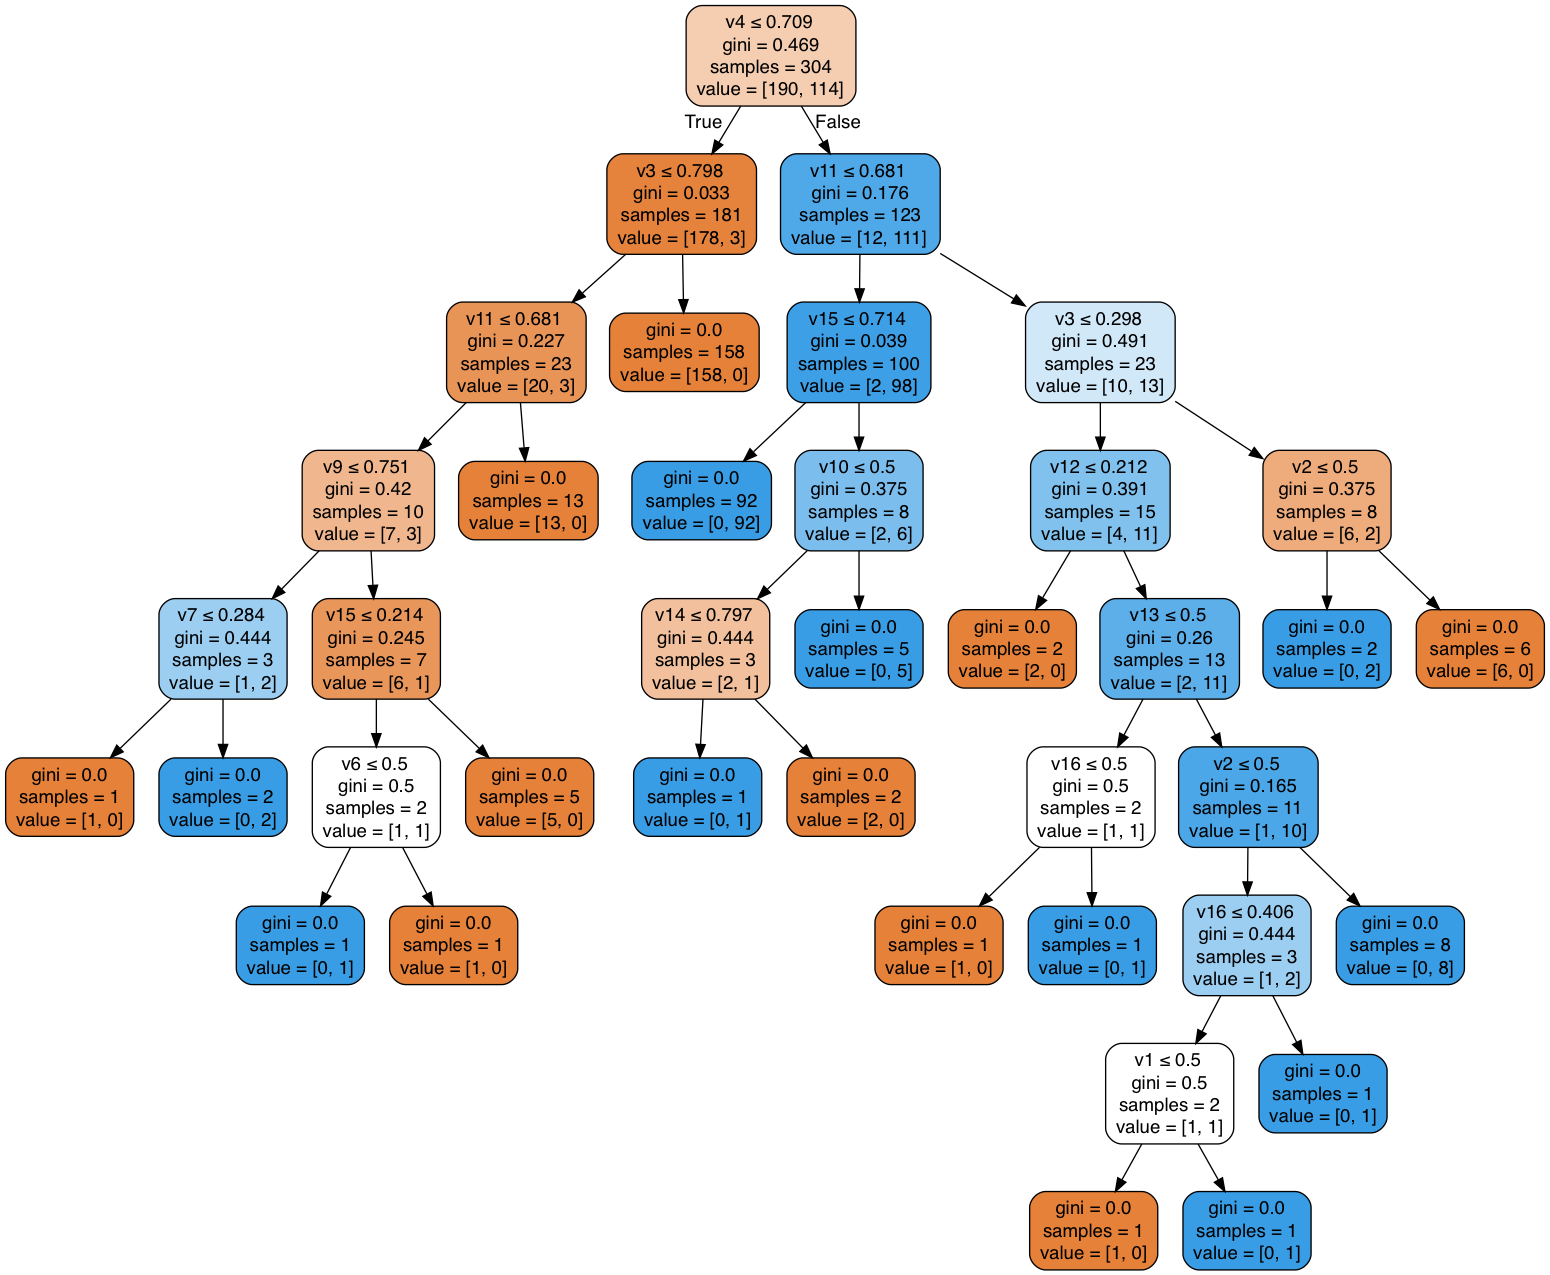

In [3]:
dot_data = StringIO()
export_graphviz(DTC.fit(X_train, y_train), out_file= dot_data,
                    feature_names=X_train.columns.tolist(),  
                    filled=True, rounded=True, 
                    special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

**Challenge Number 2**

In [4]:
df2 = pd.read_csv('2013_movies.csv')
df2.dropna(inplace=True)
y2 = df2['Rating']
X2 = df2[[v for v in df2.columns.values if v != 'Rating']]
X2 = pd.get_dummies(X2)
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size = .30, random_state = 4444)
DTC2 = DecisionTreeClassifier(random_state = 4444)
DTC2.fit(X2_train, y2_train)
y2_pred = DTC2.predict(X2_test)
print(accuracy_score(y2_test, y2_pred))

0.444444444444


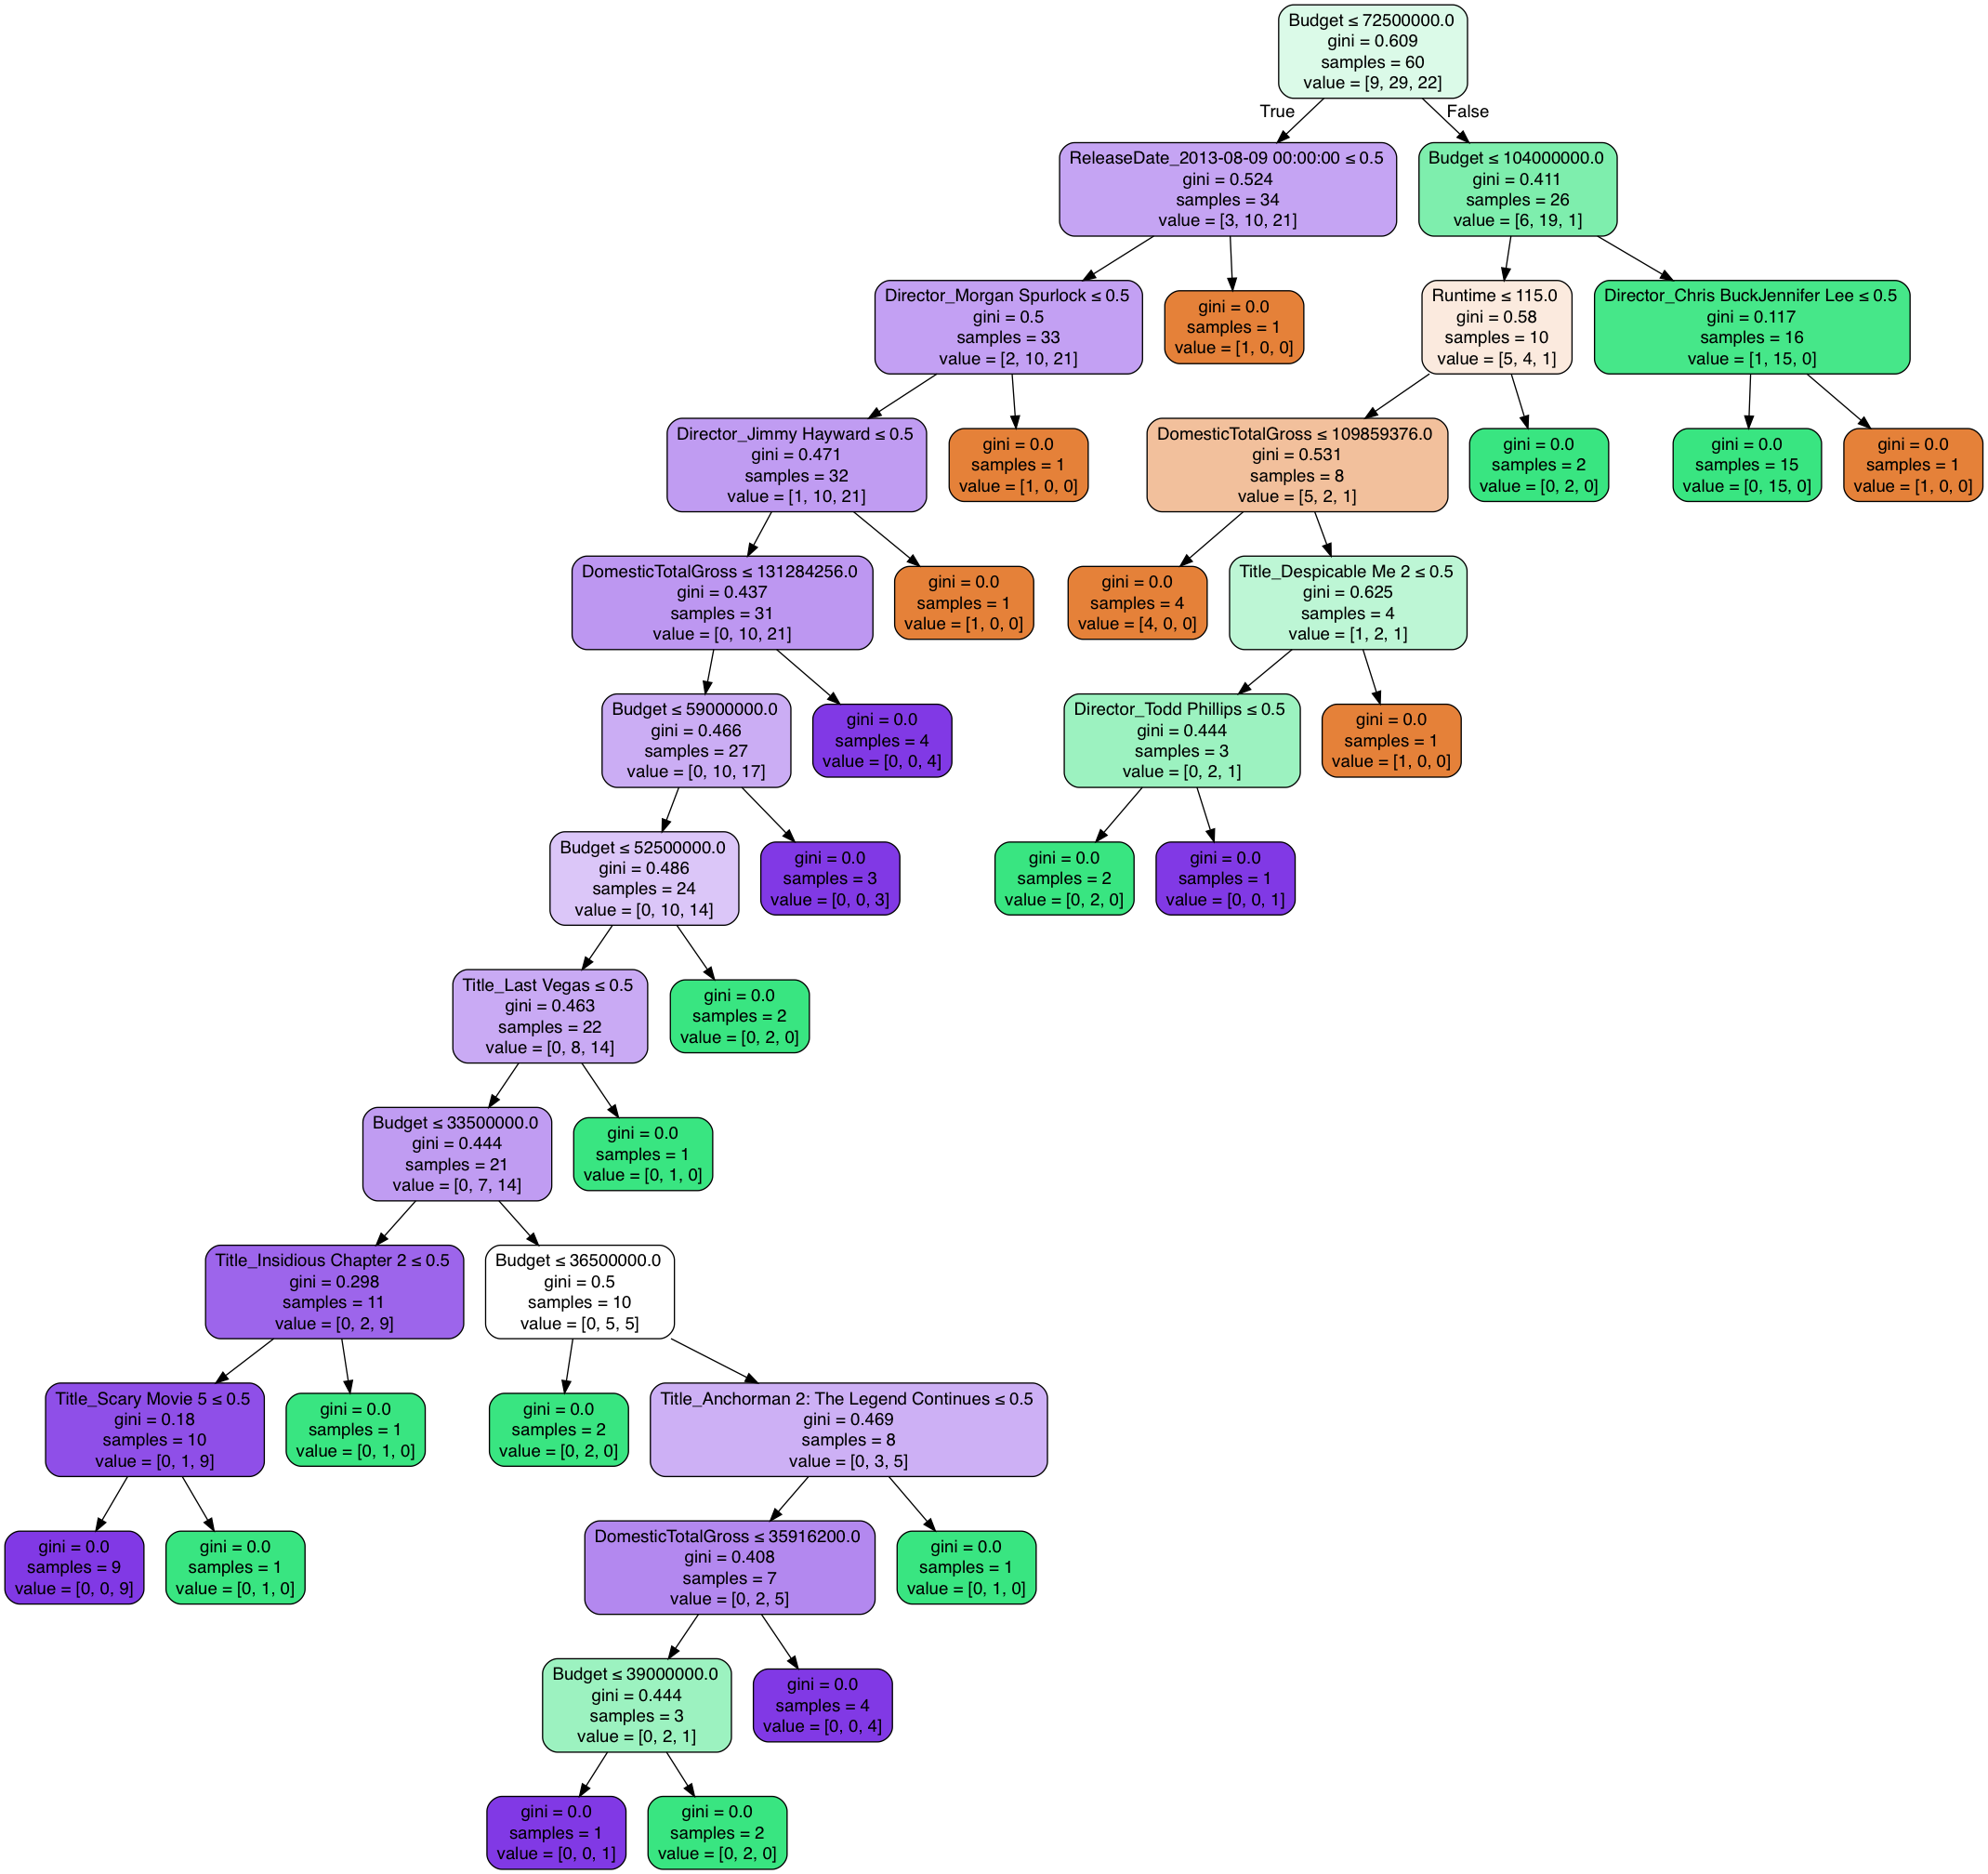

In [7]:
dot_data = StringIO()
export_graphviz(DTC2.fit(X2_train, y2_train), out_file= dot_data,
                    feature_names=X2_train.columns.tolist(),  
                    filled=True, rounded=True, 
                    special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

**Challenge Number 3**

In [8]:
url2 = 'https://storage.googleapis.com/kaggle-competitions-data/kaggle/3136/train.csv?GoogleAccessId=web-data@kaggle-161607.iam.gserviceaccount.com&Expires=1519266715&Signature=QAmWZ44uU2dmteoEgWcV%2BRLslJrMwCknx5I4Kk8evvjI69ajUWimlwojf5hEe8HTavVeEUdvYqqrXIJZpSB4wHahv%2FiIshNigAim2iV4GnNEro9NwQUh2HapuOt1l%2FfdRkFdLFO66mXVA5EhY4NghBXNvsY2TOKDpOZecFKWRuIwv0jdBHcttcCZS%2F5xjJf9IC1qRdLUc2TAFRzAL08BssfpdV%2F86QVhZrzKIq6bBwJeyOZmMeG0twqUuhXnfy0MnOuzUbUyJBlV3TyEeEHfq6vgdW%2BPCFxi6XI%2FGkgUtuXxMJMviWAFDOFsqt4PKQ20CBOFfSnlv8iU0FlQBEU2dg%3D%3D'
df3 = pd.read_csv(url2)
df3.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [9]:
df3.dropna(inplace=True)
X3 = df3[[v for v in df3.columns.values if v!='Survived']]
y3 = df3['Survived']
X3 = pd.get_dummies(X3)
X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y3, test_size = .30, random_state = 4444)
DTC3 = DecisionTreeClassifier(random_state = 4444)
DTC3.fit(X3_train, y3_train)
y3_pred = DTC3.predict(X3_test)
print(accuracy_score(y3_test, y3_pred))

0.745454545455


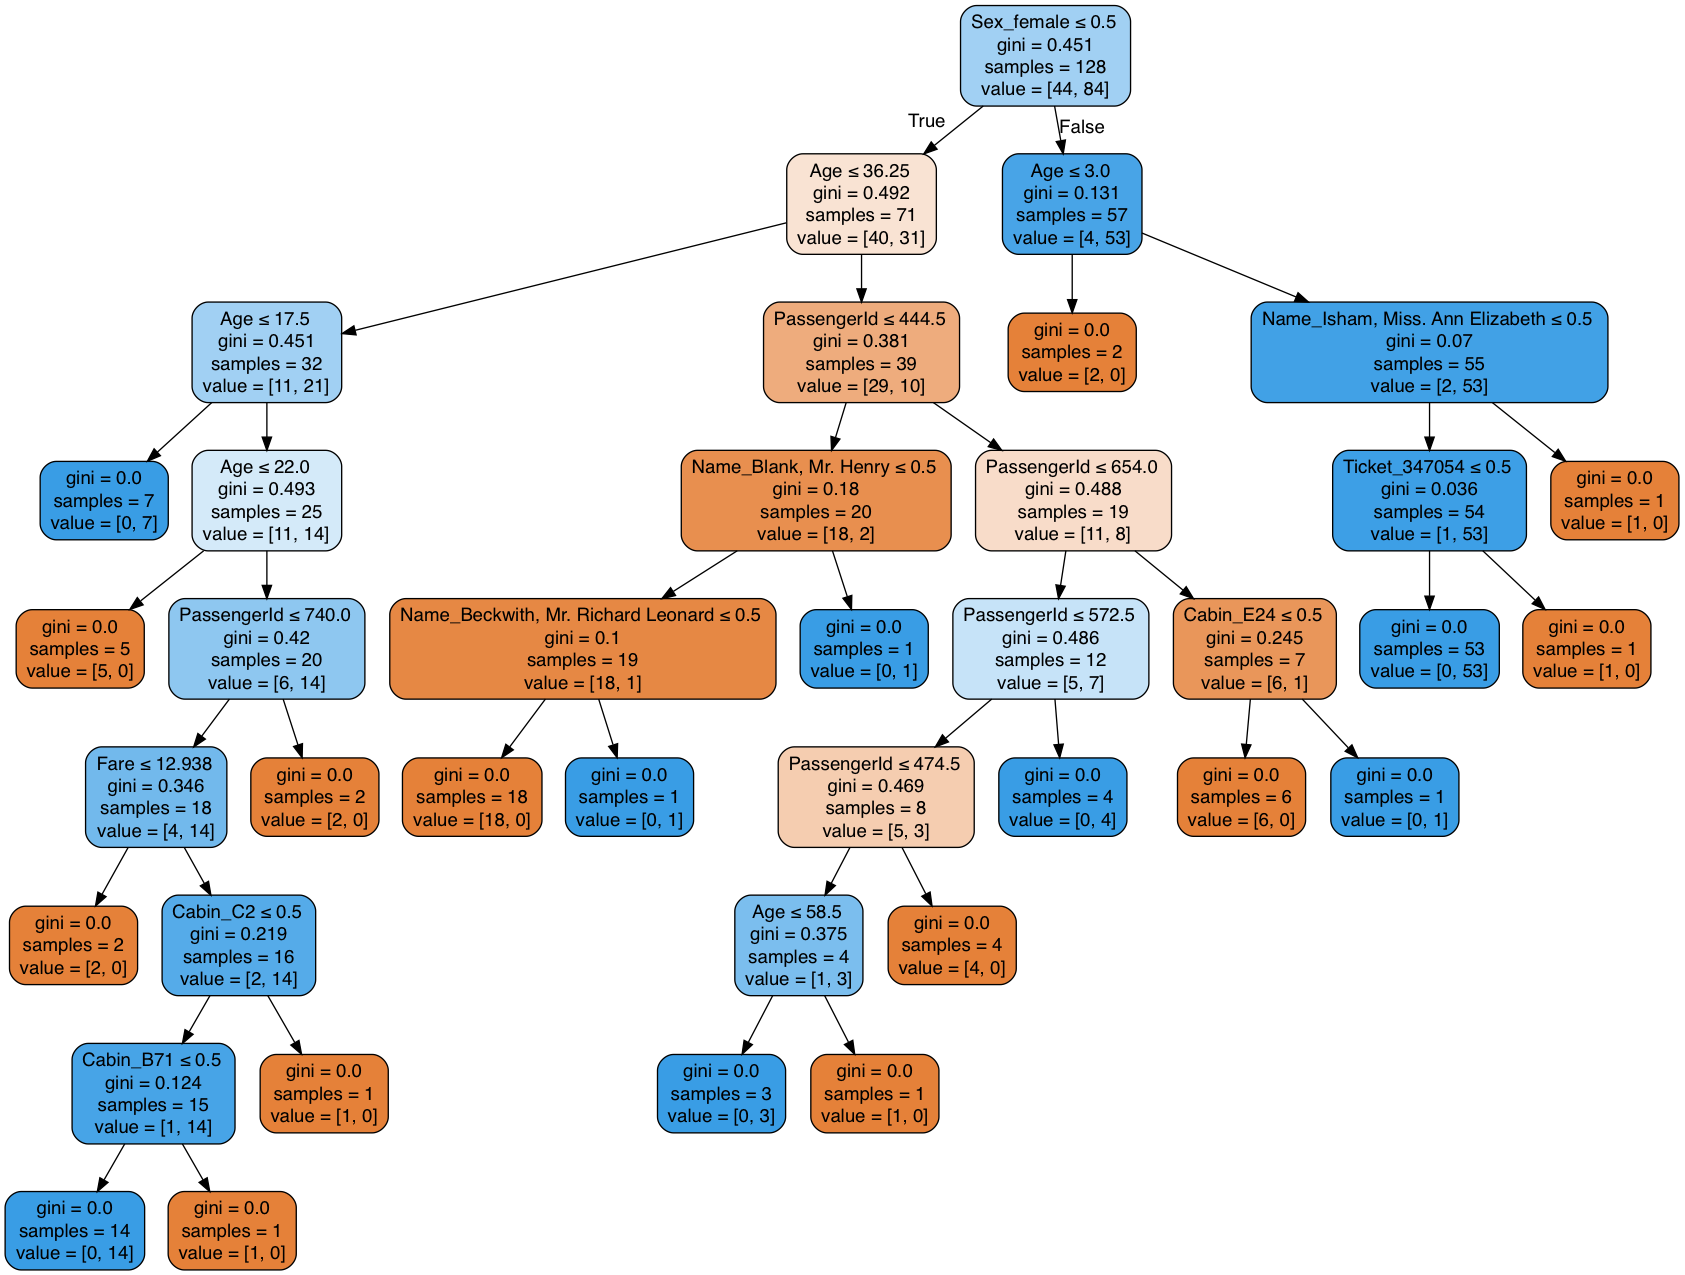

In [10]:
dot_data = StringIO()
export_graphviz(DTC3.fit(X3_train, y3_train), out_file= dot_data,
                    feature_names=X3_train.columns.tolist(),  
                    filled=True, rounded=True, 
                    special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())